In [1]:
import tensorflow as tf


In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

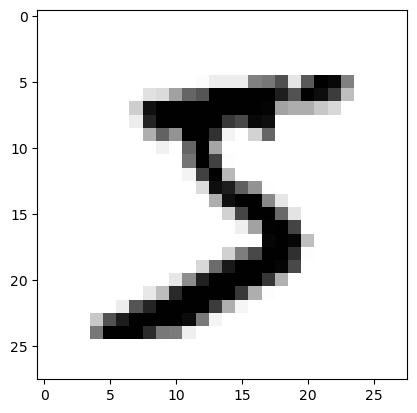

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.imshow
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

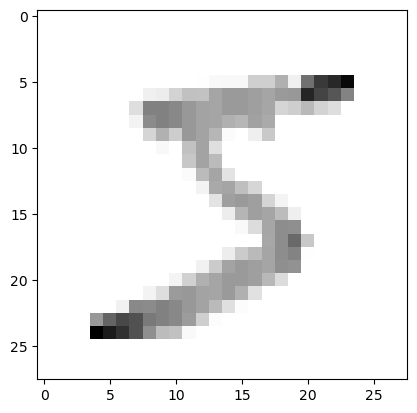

In [7]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)


In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0])

5


In [10]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("traınıng samples dimension",x_trainr.shape)
print("traınıng samples dimension",x_testr.shape)


traınıng samples dimension (60000, 28, 28, 1)
traınıng samples dimension (10000, 28, 28, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [12]:
model=Sequential()

In [13]:
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
print("total traınıng samples=",len(x_trainr))

total traınıng samples= 60000


In [16]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [17]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7810 - loss: 0.6568 - val_accuracy: 0.9567 - val_loss: 0.1387
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9680 - loss: 0.1027 - val_accuracy: 0.9726 - val_loss: 0.0907
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9775 - loss: 0.0723 - val_accuracy: 0.9780 - val_loss: 0.0726
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9844 - loss: 0.0534 - val_accuracy: 0.9787 - val_loss: 0.0727
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9867 - loss: 0.0423 - val_accuracy: 0.9747 - val_loss: 0.0865


In [18]:
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("test loss on 10.000 testsamples",test_loss)
print("validation accuracy on 10.000 test samples",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9725 - loss: 0.0983
test loss on 10.000 testsamples 0.0809064656496048
validation accuracy on 10.000 test samples 0.9775000214576721


In [19]:
predicions=model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [20]:
print(predicions)

[[9.9761195e-09 3.4461934e-06 8.3522091e-06 ... 9.9997056e-01
  8.1424184e-07 4.6784606e-07]
 [5.3960234e-06 2.5310812e-05 9.9995446e-01 ... 5.0775920e-06
  3.2480873e-08 2.0147570e-06]
 [5.8114102e-07 9.9998212e-01 2.0062937e-06 ... 8.2100196e-06
  5.3947264e-08 3.1643178e-06]
 ...
 [1.5531668e-09 8.1682174e-08 3.8768992e-09 ... 3.0382791e-06
  2.5180140e-07 4.1670959e-05]
 [8.3065534e-06 9.5416926e-06 3.9684622e-07 ... 2.6675283e-07
  3.2746157e-06 8.3345924e-07]
 [6.6122564e-04 1.8173084e-07 3.8643331e-05 ... 1.4214767e-06
  3.3290529e-05 1.4829391e-04]]


In [21]:
print(np.argmax(predicions[0]))

7


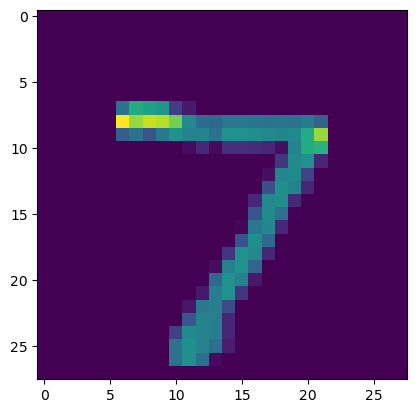

In [22]:
plt.imshow(x_test[0])


In [ ]:
import cv2 

img=cv2.imread('DORT.png')
cv2.imshow('sayı',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img.shape


In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

In [ ]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [ ]:
resized.shape

In [57]:
import tensorflow as tf

newimg=tf.keras.utils.normalize(resized,axis=1)

In [58]:
import numpy as np
IMG_SIZE=28
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [59]:
newimg.shape

(1, 28, 28, 1)

In [60]:
predicions=model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [61]:
print(np.argmax(predicions))

4
